<a href="https://colab.research.google.com/github/Keita062/work/blob/main/(12.10)%E6%A0%AA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance

In [45]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar xvzf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install TA-Lib


--2024-12-10 13:50:51--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 104.18.13.149, 104.18.12.149, 2606:4700::6812:c95, ...
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|104.18.13.149|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2024-12-10 13:50:51--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 104.18.13.149, 104.18.12.149, 2606:4700::6812:d95, ...
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz?viasf=1 [following]
--2024-12-10 13:50:51--  http://gigenet.dl.source

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import talib as ta

- トヨタ自動車: 7203.T
- 本田技研工業: 7267.T
- 日立製作所: 6501.T
- ソニーグループ: 6758.T
- 日産自動車: 7201.T
- ソフトバンク: 9984.T
- アイシン: 7259.T
- 富士通: 6702.T
- スズキ: 7269.T
- マツダ: 7261.T
- ダイキン工業: 6367.T
- NEC: 6701.T
- NTTデータ: 9613.T
- いすゞ自動車: 7202.T
- ヤマハ発動機: 7272.T
- 三菱自動車工業: 7211.T
- 東京エレクトロン: 8035.T
- 楽天グループ: 4755.T
- TDK: 6762.T
- 京セラ: 6971.T


In [8]:
Toyota_tick = "7203.T" # トヨタ
Hondagiken_tick = "7267.T" # 本田技研工業
Hitati_tick = "6501.T" # 日立製作所
Sony_tick = "6758.T" # ソニーグループ
Nissan_tick = "7201.T" # 日産自動車
Softbank_tick = "9984.T" # ソフトバンク
Aisin_tick = "7359.T" # アイシン
Fujitu_tick = "6702.T" # 富士通
Suzuki_tick = "7269.T" # スズキ

In [9]:
Toyota_df = yf.download(Toyota_tick, start="2000-01-01", end="2024-01-01")
Hondagiken_df = yf.download(Hondagiken_tick, start="2000-01-01", end="2024-01-01")
Hitati_df = yf.download(Hitati_tick, start="2000-01-01", end="2024-01-01")
Sony_df = yf.download(Sony_tick, start="2000-01-01", end="2024-01-01")
Nissan_df = yf.download(Nissan_tick, start="2000-01-01", end="2024-01-01")
Softbank_df = yf.download(Softbank_tick, start="2000-01-01", end="2024-01-01")
Aisin_df = yf.download(Aisin_tick, start="2000-01-01", end="2024-01-01")
Fujitu_df = yf.download(Fujitu_tick, start="2000-01-01", end="2024-01-01")
Suzuki_df = yf.download(Suzuki_tick,start="2000-01-01", end="2024-01-01")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [10]:
Toyota = yf.Ticker(Toyota_tick)
Hondagiken = yf.Ticker(Hondagiken_tick)
Hitati = yf.Ticker(Hitati_tick)
Sony = yf.Ticker(Sony_tick)
Nissan = yf.Ticker(Nissan_tick)
Softbank = yf.Ticker(Softbank_tick)
Aisin = yf.Ticker(Aisin_tick)
Fujitu = yf.Ticker(Fujitu_tick)
Suzuki = yf.Ticker(Suzuki_tick)

In [11]:
print(Toyota.info)

{'address1': '1 Toyota-cho', 'city': 'Toyota', 'zip': '471-8571', 'country': 'Japan', 'phone': '81 565 28 2121', 'website': 'https://global.toyota/en', 'industry': 'Auto Manufacturers', 'industryKey': 'auto-manufacturers', 'industryDisp': 'Auto Manufacturers', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': 'Toyota Motor Corporation designs, manufactures, assembles, and sells passenger vehicles, minivans and commercial vehicles, and related parts and accessories in Japan, North America, Europe, Asia, Central and South America, Oceania, Africa, and the Middle East. It operates through Automotive, Financial Services, and All Other segments. The company offers subcompact and compact cars; mini-vehicles; mid-size, luxury, sports, and specialty cars; recreational and sport-utility vehicles; pickup trucks; minivans; trucks; and buses. It offers vehicles under the Toyota and Lexus brand names. Further, the company prov

In [13]:
print(Toyota.actions) #アクション(配当、分割)を表示

                           Dividends  Stock Splits
Date                                              
1999-09-27 00:00:00+09:00        2.2           0.0
2000-03-28 00:00:00+09:00        2.6           0.0
2000-09-26 00:00:00+09:00        2.2           0.0
2001-03-27 00:00:00+09:00        2.8           0.0
2001-09-25 00:00:00+09:00        2.6           0.0
2002-03-26 00:00:00+09:00        3.0           0.0
2002-09-25 00:00:00+09:00        3.2           0.0
2003-03-26 00:00:00+09:00        4.0           0.0
2003-09-25 00:00:00+09:00        4.0           0.0
2004-03-26 00:00:00+09:00        5.0           0.0
2004-09-27 00:00:00+09:00        5.0           0.0
2005-03-28 00:00:00+09:00        8.0           0.0
2005-09-27 00:00:00+09:00        7.0           0.0
2006-03-28 00:00:00+09:00       11.0           0.0
2006-09-26 00:00:00+09:00       10.0           0.0
2007-03-27 00:00:00+09:00       14.0           0.0
2007-09-25 00:00:00+09:00       13.0           0.0
2008-03-26 00:00:00+09:00      

In [14]:
print(Toyota.capital_gains)

Series([], dtype: object)


In [16]:
Toyota.income_stmt #損益計算書

,2024-03-31,2023-03-31,2022-03-31,2021-03-31,2020-03-31
Tax Effect Of Unusual Items,85610912000.0,74823680000.0,87085600000.0,23083338000.0,NaN
Tax Rate For Calcs,0.272,0.32,0.28,0.222,NaN
Normalized EBITDA,8802138000000.0,5522169000000.0,5533850000000.0,4515086000000.0,NaN
Total Unusual Items,314746000000.0,233824000000.0,311020000000.0,103979000000.0,NaN
Total Unusual Items Excluding Goodwill,314746000000.0,233824000000.0,311020000000.0,103979000000.0,NaN
Net Income From Continuing Operation Net Minority Interest,4944933000000.0,2451318000000.0,2850110000000.0,2245261000000.0,NaN
Reconciled Depreciation,2087066000000.0,2039904000000.0,1821880000000.0,1644290000000.0,NaN
Reconciled Cost Of Revenue,35727007000000.0,30841282000000.0,25407834000000.0,22382220000000.0,NaN
EBITDA,9116884000000.0,5755993000000.0,5844870000000.0,4619065000000.0,NaN
EBIT,7029818000000.0,3716089000000.0,4022990000000.0,2974775000000.0,NaN


In [17]:
Toyota.balance_sheet # バランスシート

,2024-03-31,2023-03-31,2022-03-31,2021-03-31,2020-03-31
Treasury Shares Number,2840815433.0,2749807731.0,2536685916.0,2335244160.0,NaN
Ordinary Shares Number,13474172027.0,13565179729.0,13778301544.0,13979743300.0,NaN
Share Issued,16314987460.0,16314987460.0,16314987460.0,16314987460.0,NaN
Net Debt,26687153000000.0,21407186000000.0,19961774000000.0,20197886000000.0,NaN
Total Debt,36561781000000.0,29380272000000.0,26496357000000.0,25659634000000.0,NaN
...,...,...,...,...,...
Cash Cash Equivalents And Short Term Investments,14114228000000.0,9232641000000.0,8620903000000.0,9316314000000.0,NaN
Other Short Term Investments,4702168000000.0,1715675000000.0,2507248000000.0,4215457000000.0,NaN
Cash And Cash Equivalents,9412060000000.0,7516966000000.0,6113655000000.0,5100857000000.0,NaN
Cash Equivalents,3166803000000.0,1568669000000.0,1482773000000.0,1754456000000.0,NaN


In [18]:
Toyota.cash_flow #キャッシュフロー

,2024-03-31,2023-03-31,2022-03-31,2021-03-31,2020-03-31
Free Cash Flow,-842021000000.0,-750756000000.0,-107629000000.0,-1040783000000.0,NaN
Repurchase Of Capital Stock,NaN,NaN,NaN,NaN,-476129000000.0
Repayment Of Debt,-8752329000000.0,-8353033000000.0,-8843665000000.0,-5416376000000.0,NaN
Issuance Of Debt,12057349000000.0,9276918000000.0,8122678000000.0,9656216000000.0,NaN
Capital Expenditure,-5048394000000.0,-3705832000000.0,-3830244000000.0,-3767945000000.0,NaN
...,...,...,...,...,...
Operating Gains Losses,-763137000000.0,-643063000000.0,-560346000000.0,-351029000000.0,NaN
Pension And Employee Benefit Expense,NaN,NaN,NaN,NaN,15699000000.0
Earnings Losses From Equity Investments,-763137000000.0,-643063000000.0,-560346000000.0,-351029000000.0,NaN
Gain Loss On Sale Of PPE,NaN,NaN,NaN,NaN,56913000000.0


In [19]:
print(Toyota_df.shape)
print(Hondagiken_df.shape)
print(Hitati_df.shape)
print(Sony_df.shape)
print(Nissan_df.shape)
print(Softbank_df.shape)
print(Aisin_df.shape)
print(Fujitu_df.shape)
print(Suzuki_df.shape)

(6004, 6)
(6003, 6)
(6003, 6)
(6003, 6)
(6003, 6)
(6003, 6)
(740, 6)
(6003, 6)
(6003, 6)


In [21]:
print(Toyota_df.describe())
print(Hondagiken_df.describe())
print(Hitati_df.describe())
print(Sony_df.describe())
print(Nissan_df.describe())
print(Softbank_df.describe())
print(Aisin_df.describe())
print(Fujitu_df.describe())
print(Suzuki_df.describe())

Price     Adj Close        Close         High          Low         Open  \
Ticker       7203.T       7203.T       7203.T       7203.T       7203.T   
count   6004.000000  6004.000000  6004.000000  6004.000000  6004.000000   
mean     876.824038  1153.727582  1163.676389  1144.153598  1154.118287   
std      502.085642   474.110678   477.648075   470.216423   473.792600   
min      296.511871   475.200012   479.200012   466.000000   467.000000   
25%      469.736626   740.000000   746.000000   732.000000   740.000000   
50%      783.402588  1160.000000  1170.599976  1150.000000  1160.000000   
75%     1141.768372  1413.450012  1424.800049  1403.000000  1415.000000   
max     2816.778076  2892.500000  2911.500000  2860.000000  2900.000000   

Price         Volume  
Ticker        7203.T  
count   6.004000e+03  
mean    3.662031e+07  
std     2.136151e+07  
min     0.000000e+00  
25%     2.286588e+07  
50%     3.187400e+07  
75%     4.578750e+07  
max     2.825575e+08  
Price     Adj Close

In [40]:
ticker = [Toyota_tick,
          Hondagiken_tick,
          Hitati_tick,
          Sony_tick,
          Nissan_tick,
          Softbank_tick,
          Aisin_tick,
          Fujitu_tick,
          Suzuki_tick]

In [23]:
data = yf.download(ticker, start='2020-01-01', end='2023-12-31')['Close']

[*********************100%***********************]  8 of 8 completed


<Figure size 1000x500 with 0 Axes>

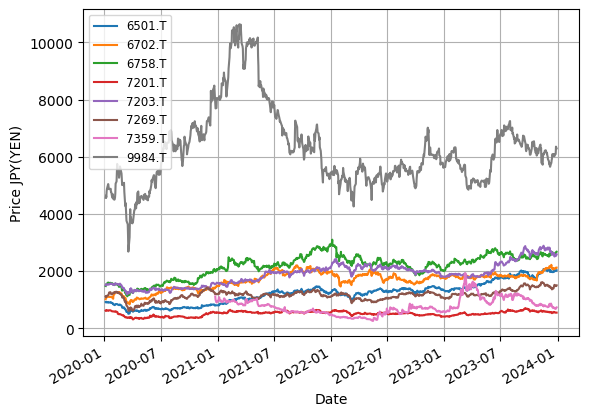

In [25]:
# 株価の推移
plt.figure(figsize=(10, 5))
data.plot()
plt.xlabel('Date')
plt.ylabel('Price JPY(YEN)')
plt.legend(loc = 'upper left' , fontsize = "small")
plt.grid()
plt.show()

In [27]:
# 移動平均線の計算（短期: 20日, 中期: 50日, 長期: 200日）
short_term = data.rolling(window=20).mean()
mid_term = data.rolling(window=50).mean()
long_term = data.rolling(window=100).mean()

<Figure size 1000x500 with 0 Axes>

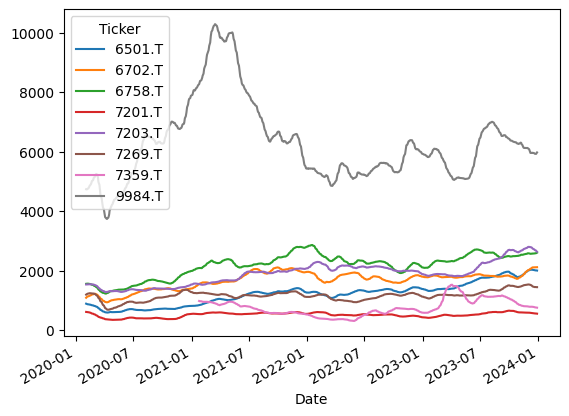

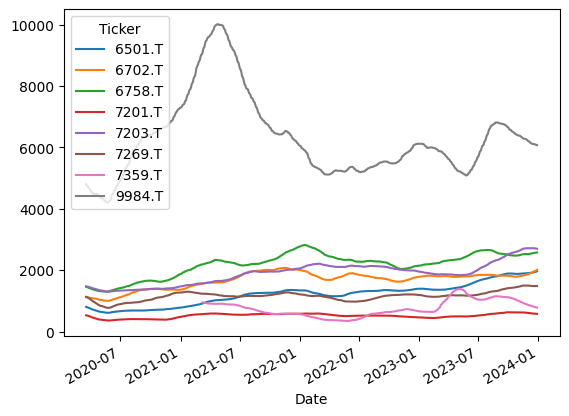

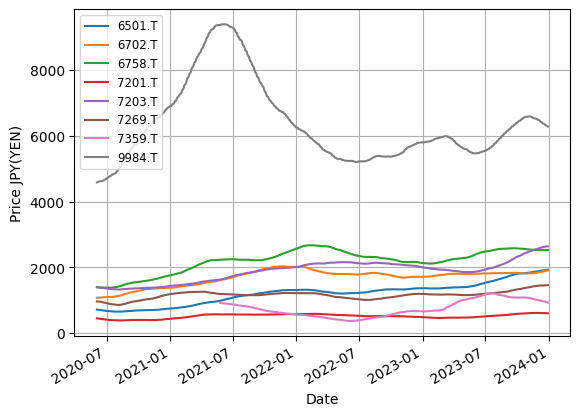

In [30]:
plt.figure(figsize=(10, 5))
short_term.plot()
mid_term.plot()
long_term.plot()
plt.xlabel('Date')
plt.ylabel('Price JPY(YEN)')
plt.legend(loc = 'upper left' , fontsize = "small")
plt.grid()
plt.show()

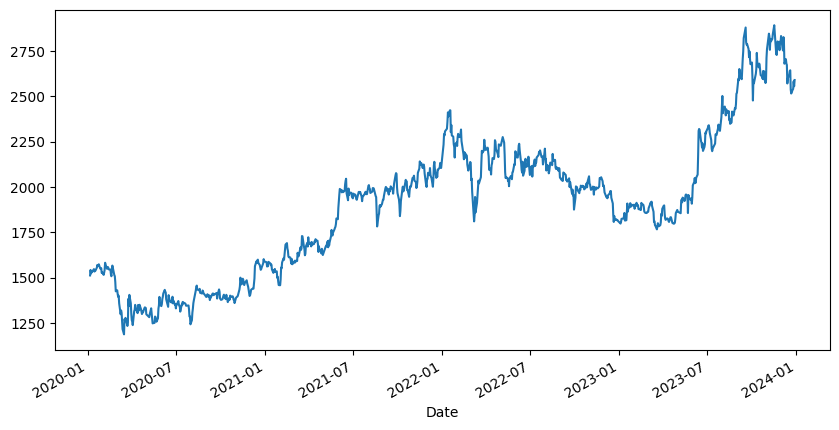

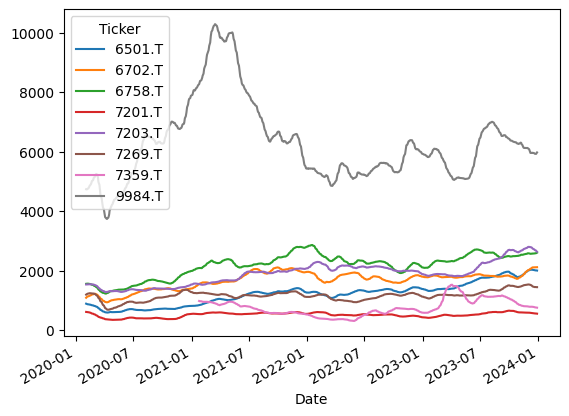

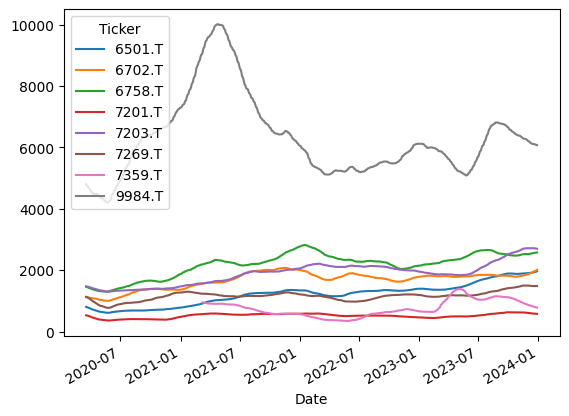

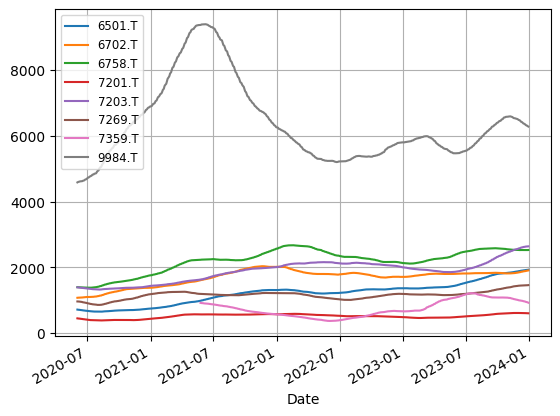

In [32]:
plt.figure(figsize=(10, 5))
data['7203.T'].plot(label='Toyota Close Price')
short_term.plot(label='short_term')
mid_term.plot(label='mid_term')
long_term.plot(label='long_term')
plt.legend(loc = 'upper left' , fontsize = "small")
plt.grid()
plt.show()

In [39]:
ticker

['7203.T',
 '6501.T',
 '6758.T',
 '7201.T',
 '9984.T',
 '7359.T',
 '6702.T',
 '7269.T']

[*********************100%***********************]  9 of 9 completed


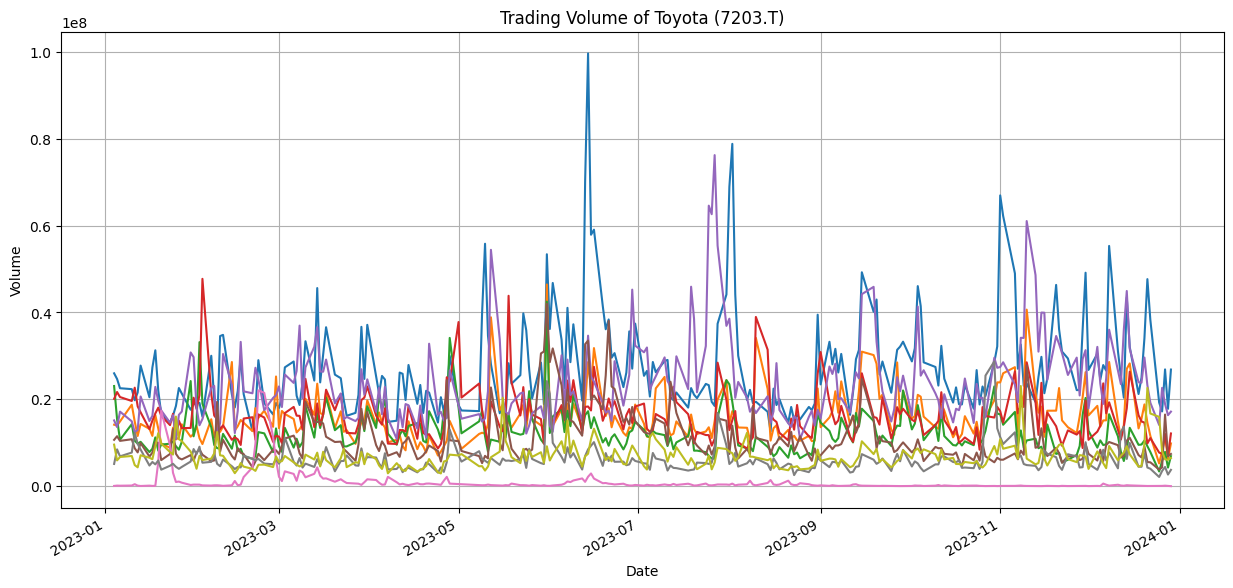

In [41]:
# 取引量の変化（取引量データが含まれている場合、データにアクセスする）
# 取引量データを使用して、トレードの活発度を確認する
volume_data = yf.download(ticker, start='2023-01-01', end='2023-12-31')['Volume']
plt.figure(figsize=(15, 7))
volume_data['7203.T'].plot(title="Trading Volume of Toyota (7203.T)")
volume_data['7267.T'].plot(title="Trading Volume of Toyota (7203.T)")
volume_data['6501.T'].plot(title="Trading Volume of Toyota (7203.T)")
volume_data['6758.T'].plot(title="Trading Volume of Toyota (7203.T)")
volume_data['7201.T'].plot(title="Trading Volume of Toyota (7203.T)")
volume_data['9984.T'].plot(title="Trading Volume of Toyota (7203.T)")
volume_data['7359.T'].plot(title="Trading Volume of Toyota (7203.T)")
volume_data['6702.T'].plot(title="Trading Volume of Toyota (7203.T)")
volume_data['7269.T'].plot(title="Trading Volume of Toyota (7203.T)")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.grid()
plt.show()

In [47]:
# RSIの計算
def computer_RSI(data, window=14):
    return ta.RSI(data, timeperiod=window)

In [48]:
rsi_data = data.apply(computer_RSI)
rsi_data

Ticker,6501.T,6702.T,6758.T,7201.T,7203.T,7269.T,7359.T,9984.T
Date,,,,,,,,
2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2023-12-25,52.972789,53.444597,53.922714,45.120209,36.848279,54.387473,36.033211,55.040489
2023-12-26,51.708260,54.151728,54.631154,42.187436,37.335697,52.058954,36.416501,55.040489
2023-12-27,56.928243,57.295163,58.937228,42.977437,42.365730,52.210913,41.856831,65.625531


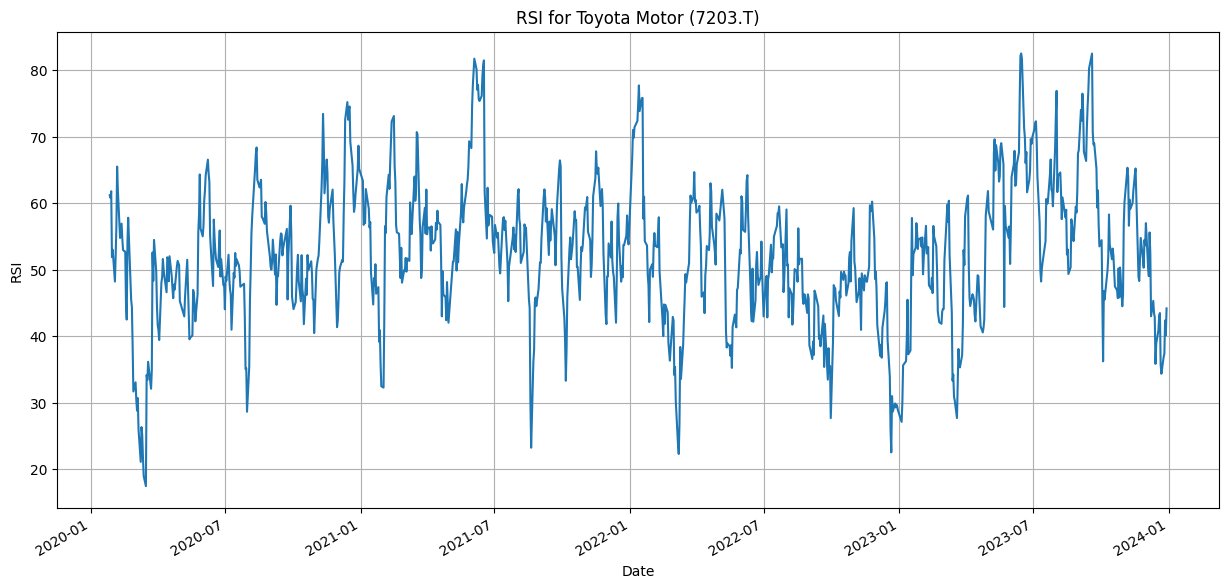

In [49]:
# RSIのプロット
plt.figure(figsize=(15, 7))
rsi_data['7203.T'].plot(title="RSI for Toyota Motor (7203.T)")
plt.xlabel("Date")
plt.ylabel("RSI")
plt.grid()
plt.show()

In [50]:
# MACDの計算
macd, macdsignal, macdhist = ta.MACD(data['7203.T'], fastperiod=12, slowperiod=26, signalperiod=9)
print(macd)
print(macdsignal)
print(macdhist)

Date
2020-01-06          NaN
2020-01-07          NaN
2020-01-08          NaN
2020-01-09          NaN
2020-01-10          NaN
                ...    
2023-12-25   -54.165426
2023-12-26   -56.155035
2023-12-27   -53.723475
2023-12-28   -53.360020
2023-12-29   -49.715033
Length: 977, dtype: float64
Date
2020-01-06          NaN
2020-01-07          NaN
2020-01-08          NaN
2020-01-09          NaN
2020-01-10          NaN
                ...    
2023-12-25   -33.926900
2023-12-26   -38.372527
2023-12-27   -41.442716
2023-12-28   -43.826177
2023-12-29   -45.003948
Length: 977, dtype: float64
Date
2020-01-06          NaN
2020-01-07          NaN
2020-01-08          NaN
2020-01-09          NaN
2020-01-10          NaN
                ...    
2023-12-25   -20.238526
2023-12-26   -17.782508
2023-12-27   -12.280759
2023-12-28    -9.533843
2023-12-29    -4.711085
Length: 977, dtype: float64
